> Recurrent neural networks (RNNs), a class of nets that can
predict the future

# Recurrent Neurons and Layers

A recurrent neural network looks very much like a feedforward neural network, except it also has connections pointing backward

Let’s look at the simplest possible RNN, composed of one neuron receiving **inputs,** producing an **output**, and sending that **output back to itself,** as shown in Figure 15-1 (left)

At each time step t (also called a frame), this recurrent neuron **receives** the inputs **$x_{(t)}$** as well as its own **output** from the **previous time step, $y_{t-1}$**. At each time step t (also called a frame), this recurrent neuron receives the inputs

We can represent this tiny network against the time axis, as shown in Figure 15-1 (right). This is called **unrolling the network through time**

<p align='center'>
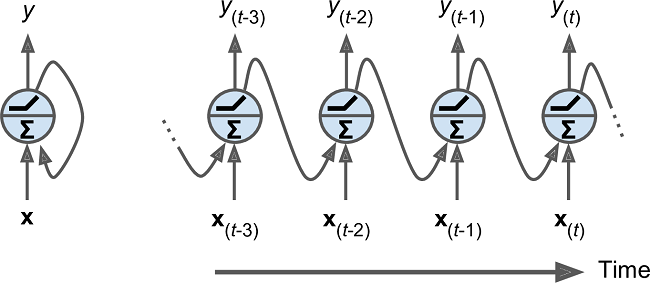
</p>
Figure 15-1. A recurrent neuron (left) unrolled through time (right)

At each time step t, **every neuron receives both the input vector $x_{(t)}$ and the output vector from the previous time step $y_{t-1}$,** as shown in Figure 15-2

Note that both the inputs and outputs are vectors now (when there was just a single neuron, the output was a scalar)

<p align='center'>
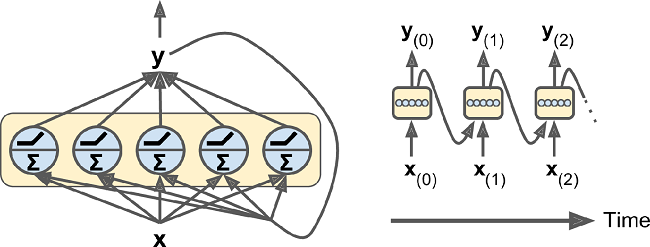
</p>
Figure 15-2. A layer of recurrent neurons (left) unrolled through time (right)

**Each recurrent neuron has two sets of weights:** one for the **inputs $x_{(t)}$** and the other for the **outputs of the previous time step, $y_{(t-1)}$**. Let’s call these weight vectors $w_x$ and $w_y$

If we consider the **whole recurrent layer** instead of just one recurrent neuron, we can place all the **weight vectors in two weight matrices, $W_x$ and $W_y$**

The output vector of the whole recurrent layer can then be computed pretty much as you might expect, as shown in Equation 15-1 (b is the bias vector and $Φ(.)$ is the activation function)

Equation 15-1. Output of a recurrent layer for a single instance

$$y_{(t)} = \phi({W_x}^T x_{(t)} + {W_y}^T y_{(t-1)} + b) $$

Just as with feedforward neural networks, we can compute a recurrent layer’s output in one shot for a whole **mini-batch** by placing all the inputs at time step t in an input matrix $X_{(t)}$ (see Equation 15-2)

Equation 15-2. Outputs of a layer of recurrent neurons for all instances in a mini-batch
<p align='center'>
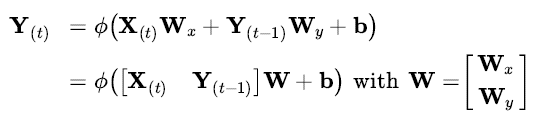
</p>

In this equation:

* $Y_{(t)}$ is an **$m \times n_{\text{neurons}}$ matrix** containing the layer's outputs at time step t for each instance in the **mini-batch** (m is the number of instances in the mini-batch and $n_{\text{neurons}}$ is the number of neurons)

* $X_{(t)}$ is an $m \times n_{\text{inputs}}$ matrix containing the **inputs for all instances** ($n_{\text{inputs}}$ is the number of input features)

* $W_x$ is an $n_{\text{inputs}} \times n_{\text{neurons}}$ matrix containing the **connection weights for the inputs of the current time step**

* $W_y$ is an $n_{\text{neurons}} \times n_{\text{neurons}}$ matrix containing the **connection weights for the outputs of the previous time step**

* $b$ is a vector of size $n_{\text{neurons}} containing **each neuron's bias term**

* The weight matrices **$W_x$ and $W_y$** are often concatenated vertically **bold text** into a **single weight matrix W** of shape $(n_{\text{inputs}} + n_{\text{neurons}}) \times n_{\text{neurons}}$ (see the second line of Equation 15-2)

* The notation $[X_{(t)} Y_{(t-1)}]$ represents the horizontal concatenation of the matrices 

Notice that $Y_{(t)}$ is a function of $X_{(t)}$ and $Y_{(t-1)}$, which is a function of $X_{(t-1)}$ and $Y_{(t-2)}$, which is a function of $X_{(t-2)}$ and $Y_{(t-3)}$, and so on

This makes $Y_{(t)}$ a function of all the inputs since time t = 0 (that is, $X_{(0)}, X_{(1)}, \dots, X_{(t)}$

At the first time step, t = 0, there are no previous outpus, so they are typically assumed to be all zeros

## Memory Cells